# UAP Self Organizing Maps

SOM merupakan model JST yang melatih data dengan pendekatan unsupervised learning. Pada praktikum, penentuan jumlah cluster didasarkan pada nilai  Silhouette untuk mengukur homogenitas cluster. Pada UAP kali ini, implementasikan penentuan jumlah cluster yang optimal dengan elbow method.

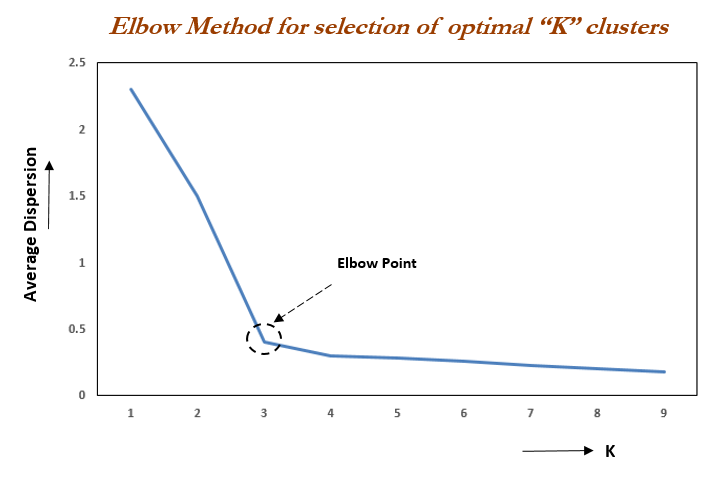

In [1]:
# Training SOM

import numpy as np
import matplotlib.pyplot as plt

def som(X, lrate, b, max_epoch, n_cluster):
    centroids = np.random.uniform(size=(n_cluster, len(X[0])))
    epoch = 0
    labels = []
    while epoch < max_epoch:
        for x in X:
            d = [sum((w - x) ** 2) for w in centroids]
            min_index = np.argmin(d)
            centroids[min_index] += lrate * (x - centroids[min_index])
        lrate *= b
        epoch += 1

    for x in X:
        d = [sum((w - x) ** 2) for w in centroids]
        min_index = np.argmin(d)
        labels.append(min_index)
    return centroids, labels

def draw(X, target, centroids):
    colors = 'rgbcmyk'
    for x, label in zip(X, target):
        plt.plot(x[0], x[1], colors[label] + '.')
    plt.plot(centroids[:, 0], centroids[:, 1], 'kx')


In [2]:
# Fungsi Elbow Method

def elbow_method(X, max_cluster):
    distortions = []
    for num_cluster in range(1, max_cluster + 1):
        centroids, labels = som(X, lrate=0.1, b=0.5, max_epoch=100, n_cluster=num_cluster)
        distortions.append(sum([np.linalg.norm(x - centroids[labels[i]]) ** 2 for i, x in enumerate(X)]))

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_cluster + 1), distortions, 'bx-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method for SOM')
    plt.show()

    elbow = np.diff(distortions, 2)
    best_k = -1
    max_val = -float('inf')
    for i, val in enumerate(elbow):
        if val > max_val:
            max_val = val
            best_k = i + 2

    return best_k

In [17]:
# Hanya gunakan kolom A1 - A14 dan drop kolom CustomerID dan Class
data = data.iloc[:, 1:15].drop(columns=['CustomerID', 'Class'])

NameError: ignored

In [ ]:
# Tentukan jumlah cluster optimal dengan memanggil fungsi Elbow Method
best_k = elbow_method(data, 15)

In [ ]:
# Lakukan pelatihan dan pengujian data dengan memanggil fungsi SOM dan parameter cluster yang digunakan adalah best_k
# Lakukan tuning parameter untuk menghasilkan nilai silhouette yang paling optimal

X = data[:, 1:15].drop(columns=['CustomerID', 'Class'])
centroids, labels = som(X, lrate=..., b=..., max_epoch=..., n_cluster=...)

# Hitung Silhouette score
silhouette = silhouette_score(...)
print('Silhouette score:', silhouette)
draw(X, labels, centroids)

# Analisis

1. Jelaskan konsep Elbow Method di SOM!
2. Berapa jumlah cluster paling optimal yang dihasilkan melalui Elbow Method?
3. Jelaskan pengaruh lrate, b, max_epoch, dan n_cluster pada tuning parameter yang anda lakukan!

Jawab disini